In [47]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
from sklearn.model_selection import cross_val_score, GridSearchCV

data1=[] #menyiapkan list 
data2=[]
data3=[]
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        file_path = os.path.join(dirname, filename)
        #print(file_path)
        if file_path.__contains__('1g'):
            data1.append(file_path)
        elif file_path.__contains__('2g'):
            data2.append(file_path)
        elif file_path.__contains__('3g'):
            data3.append(file_path)


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [48]:
for x,y,z in zip(data1, data2,data3):
    print(f'{x},{y},{z}')
    

In [49]:
#concat datalas adi
"""
adi_acc = pd.read_csv('/kaggle/input/datalas1g/adi_acc_1g.csv')
adi_mag = pd.read_csv('/kaggle/input/datalas1g/adi_mag_1g.csv')
adi_gyr = pd.read_csv('/kaggle/input/datalas1g/adi_gyr_1g.csv')
jko_acc = pd.read_csv('/kaggle/input/datalas1g/jko_acc_1g.csv')
jko_mag = pd.read_csv('/kaggle/input/datalas1g/jko_mag_1g.csv')
jko_gyr = pd.read_csv('/kaggle/input/datalas1g/jko_gyr_1g.csv')
"""
jok_acc = pd.read_csv('/kaggle/input/datalas1g/jok_acc_1g.csv')
jok_mag = pd.read_csv('/kaggle/input/datalas1g/jok_mag_1g.csv')
jok_gyr = pd.read_csv('/kaggle/input/datalas1g/jok_gyr_1g.csv')

In [50]:
jok_acc.head()

,epoc (ms),timestamp (+0700),elapsed (s),x-axis (g),y-axis (g),z-axis (g),actid,subid-gradeid,positionid,dicontinuityid
0,1.610000e+12,2021-01-22T13.51.51.072,0.00,0.671,-0.671,0.793,Welding,3,1,1
1,1.610000e+12,2021-01-22T13.51.51.112,0.04,1.037,-1.402,1.280,Welding,3,1,1
2,1.610000e+12,2021-01-22T13.51.51.153,0.08,1.463,-0.732,1.402,Welding,3,1,1
3,1.610000e+12,2021-01-22T13.51.51.192,0.12,0.854,0.061,0.854,Welding,3,1,1
4,1.610000e+12,2021-01-22T13.51.51.233,0.16,1.220,-0.854,3.171,Welding,3,1,1


In [51]:
act = jok_acc['actid']
pos = jok_acc['positionid']
activity = ['Welding', 'Slag Cleaning', 'Grinding']
act_pos = [str(i)+'_'+ str(j)+'g' if i in activity else str(i) for i,j in zip(act,pos) ]
df_act_pos = pd.DataFrame (act_pos)
df_act_pos[0].unique()

array(['Welding_1g', 'Others', 'Preparation', 'Slag Cleaning_1g',
       'Grinding_1g'], dtype=object)

In [52]:
jok_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65182 entries, 0 to 65181
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0    epoc (ms)         65182 non-null  float64
 1   timestamp (+0700)  65182 non-null  object 
 2   elapsed (s)        65182 non-null  float64
 3   x-axis (g)         65182 non-null  float64
 4   y-axis (g)         65182 non-null  float64
 5   z-axis (g)         65182 non-null  float64
 6   actid              65182 non-null  object 
 7   subid-gradeid      65182 non-null  int64  
 8   positionid         65182 non-null  int64  
 9   dicontinuityid     65182 non-null  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 5.0+ MB


In [53]:
#adi_acc.info()
#adi_acc.set_index('elapsed (s)')
jok_acc.set_index('elapsed (s)')

,epoc (ms),timestamp (+0700),x-axis (g),y-axis (g),z-axis (g),actid,subid-gradeid,positionid,dicontinuityid
elapsed (s),,,,,,,,,
0.00,1.610000e+12,2021-01-22T13.51.51.072,0.671,-0.671,0.793,Welding,3,1,1
0.04,1.610000e+12,2021-01-22T13.51.51.112,1.037,-1.402,1.280,Welding,3,1,1
0.08,1.610000e+12,2021-01-22T13.51.51.153,1.463,-0.732,1.402,Welding,3,1,1
0.12,1.610000e+12,2021-01-22T13.51.51.192,0.854,0.061,0.854,Welding,3,1,1
0.16,1.610000e+12,2021-01-22T13.51.51.233,1.220,-0.854,3.171,Welding,3,1,1
...,...,...,...,...,...,...,...,...,...
2607.08,1.610000e+12,2021-01-22T14.59.03.800,-1.098,-0.122,-0.732,Others,3,1,0
2607.12,1.610000e+12,2021-01-22T14.59.03.840,-1.463,-0.244,-0.915,Others,3,1,0
2607.16,1.610000e+12,2021-01-22T14.59.03.879,-1.341,-0.122,-0.610,Others,3,1,0


In [54]:
jok_acc.rename(columns={'timestamp (+0700)': 'timestamp','epoc (ms)':'epoc_ms','elapsed (s)':'elapsed','x-axis (g)': 'accx', 'y-axis (g)': 'accy', 'z-axis (g)':'accz'}, inplace=True)
jok_acc.columns

Index([' epoc (ms) ', 'timestamp', 'elapsed', 'accx', 'accy', 'accz', 'actid',
       'subid-gradeid', 'positionid', 'dicontinuityid'],
      dtype='object')

In [55]:
jok_mag.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65182 entries, 0 to 65181
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0    epoc (ms)         65182 non-null  float64
 1   timestamp (+0700)  65182 non-null  object 
 2   elapsed (s)        65182 non-null  float64
 3   x-axis (T)         65182 non-null  float64
 4   y-axis (T)         65182 non-null  float64
 5   z-axis (T)         65182 non-null  float64
 6   actid              65182 non-null  object 
 7   subid-gradeid      65182 non-null  int64  
 8   positionid         65182 non-null  int64  
 9   dicontinuityid     65182 non-null  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 5.0+ MB


In [56]:
jok_mag.rename(columns={'x-axis (T)': 'magx', 'y-axis (T)': 'magy', 'z-axis (T)':'magz'}, inplace=True)
jok_mag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65182 entries, 0 to 65181
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0    epoc (ms)         65182 non-null  float64
 1   timestamp (+0700)  65182 non-null  object 
 2   elapsed (s)        65182 non-null  float64
 3   magx               65182 non-null  float64
 4   magy               65182 non-null  float64
 5   magz               65182 non-null  float64
 6   actid              65182 non-null  object 
 7   subid-gradeid      65182 non-null  int64  
 8   positionid         65182 non-null  int64  
 9   dicontinuityid     65182 non-null  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 5.0+ MB


In [57]:
#adi_mag.head()
jok_mag.set_index('elapsed (s)')

,epoc (ms),timestamp (+0700),magx,magy,magz,actid,subid-gradeid,positionid,dicontinuityid
elapsed (s),,,,,,,,,
0.00,1.610000e+12,2021-01-22T13.51.51.072,0.000004,0.000010,-3.750000e-07,Welding,3,1,1
0.04,1.610000e+12,2021-01-22T13.51.51.112,0.000003,0.000010,3.750000e-07,Welding,3,1,1
0.08,1.610000e+12,2021-01-22T13.51.51.153,0.000003,0.000011,-3.750000e-07,Welding,3,1,1
0.12,1.610000e+12,2021-01-22T13.51.51.192,0.000003,0.000010,-1.125000e-06,Welding,3,1,1
0.16,1.610000e+12,2021-01-22T13.51.51.233,0.000004,0.000009,-3.750000e-07,Welding,3,1,1
...,...,...,...,...,...,...,...,...,...
2607.08,1.610000e+12,2021-01-22T14.59.03.800,0.000013,0.000005,1.380000e-04,Others,3,1,0
2607.12,1.610000e+12,2021-01-22T14.59.03.840,-0.000164,-0.000238,1.153120e-04,Others,3,1,0
2607.16,1.610000e+12,2021-01-22T14.59.03.879,-0.000139,-0.000203,9.893700e-05,Others,3,1,0


In [58]:
#adi_gyr.info()

In [59]:
jok_gyr.rename(columns={'timestamp (+0700)': 'timestamp','epoc (ms)':'epoc_ms','elapsed (s)':'elapsed','x-axis (deg/s)': 'gyrx', 'y-axis (deg/s)': 'gyry', 'z-axis (deg/s)':'gyrz'}, inplace=True)
#adi_gyr.info()

In [60]:
jok_gyr.columns

Index([' epoc (ms) ', 'timestamp', 'elapsed', 'gyrx', 'gyry', 'gyrz', 'actid',
       'subid-gradeid', 'positionid', 'dicontinuityid'],
      dtype='object')

In [61]:
#adi_gyr.head()
#.set_index('timestamp')

In [62]:
act = jok_acc['actid']
pos = jok_acc['positionid']
activity = ['Welding', 'Slag Cleaning', 'Grinding']
act_pos = [str(i)+'_'+ str(j)+'g' if i in activity else str(i) for i,j in zip(act,pos) ]
act_pos = pd.DataFrame(act_pos)
gyr = jok_gyr[['gyrx', 'gyry', 'gyrz']]
mag = jok_mag[['magx', 'magy', 'magz']]
jok_1g= pd.concat([jok_acc, gyr, mag, act_pos], axis=1, join="inner")
jok_1g.rename(columns={0:"act_pos"}, inplace=True)
jok_1g.info()
#ditambahkan kolom dari act_pos ke selected_col





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65182 entries, 0 to 65181
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0    epoc (ms)      65182 non-null  float64
 1   timestamp       65182 non-null  object 
 2   elapsed         65182 non-null  float64
 3   accx            65182 non-null  float64
 4   accy            65182 non-null  float64
 5   accz            65182 non-null  float64
 6   actid           65182 non-null  object 
 7   subid-gradeid   65182 non-null  int64  
 8   positionid      65182 non-null  int64  
 9   dicontinuityid  65182 non-null  int64  
 10  gyrx            65182 non-null  float64
 11  gyry            65182 non-null  float64
 12  gyrz            65182 non-null  float64
 13  magx            65182 non-null  float64
 14  magy            65182 non-null  float64
 15  magz            65182 non-null  float64
 16  act_pos         65182 non-null  object 
dtypes: float64(11), int64(3), objec

In [63]:
jok_1g.columns

Index([' epoc (ms) ', 'timestamp', 'elapsed', 'accx', 'accy', 'accz', 'actid',
       'subid-gradeid', 'positionid', 'dicontinuityid', 'gyrx', 'gyry', 'gyrz',
       'magx', 'magy', 'magz', 'act_pos'],
      dtype='object')

In [64]:
selected_col = ['timestamp', 'elapsed', 'accx', 'accy',
       'accz','gyrx', 'gyry', 'gyrz', 'magx', 'magy', 'magz', 'subid-gradeid', 'dicontinuityid', 'act_pos', 'actid']
jok_1g = jok_1g[selected_col]
jok_1g = jok_1g.reindex(columns=selected_col)# penyesuaian urutan nama kolom
jok_1g.info()

#jok_1g.to_csv("jok_1g.csv", mode='a')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65182 entries, 0 to 65181
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   timestamp       65182 non-null  object 
 1   elapsed         65182 non-null  float64
 2   accx            65182 non-null  float64
 3   accy            65182 non-null  float64
 4   accz            65182 non-null  float64
 5   gyrx            65182 non-null  float64
 6   gyry            65182 non-null  float64
 7   gyrz            65182 non-null  float64
 8   magx            65182 non-null  float64
 9   magy            65182 non-null  float64
 10  magz            65182 non-null  float64
 11  subid-gradeid   65182 non-null  int64  
 12  dicontinuityid  65182 non-null  int64  
 13  act_pos         65182 non-null  object 
 14  actid           65182 non-null  object 
dtypes: float64(10), int64(2), object(3)
memory usage: 7.5+ MB


###Preprocess Data

In [65]:
#pd.unique(jok_1g.positionid)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


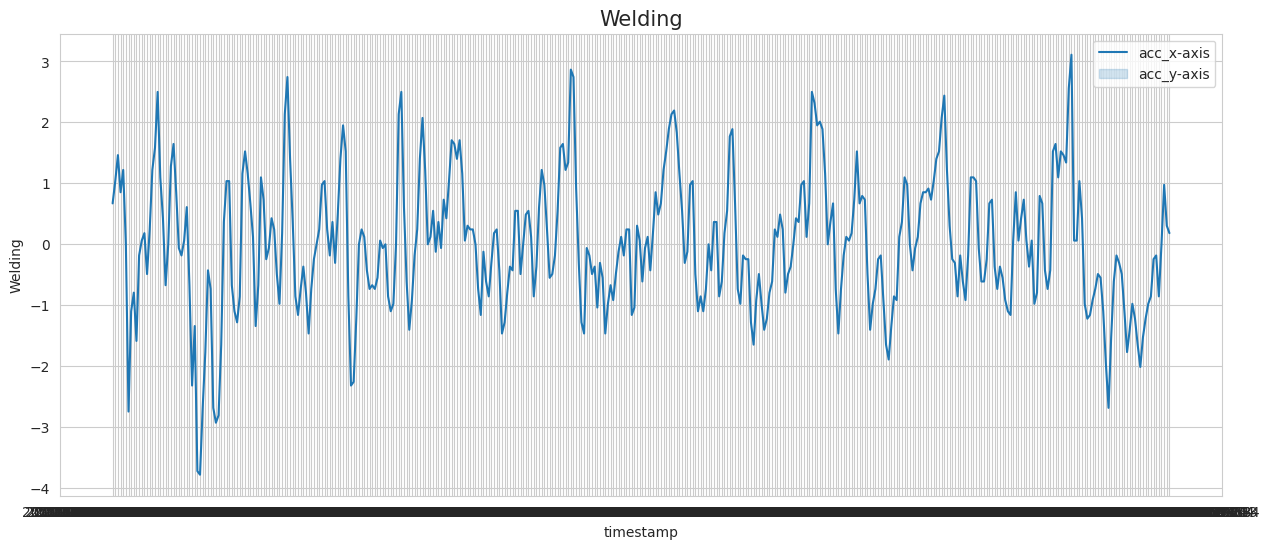

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


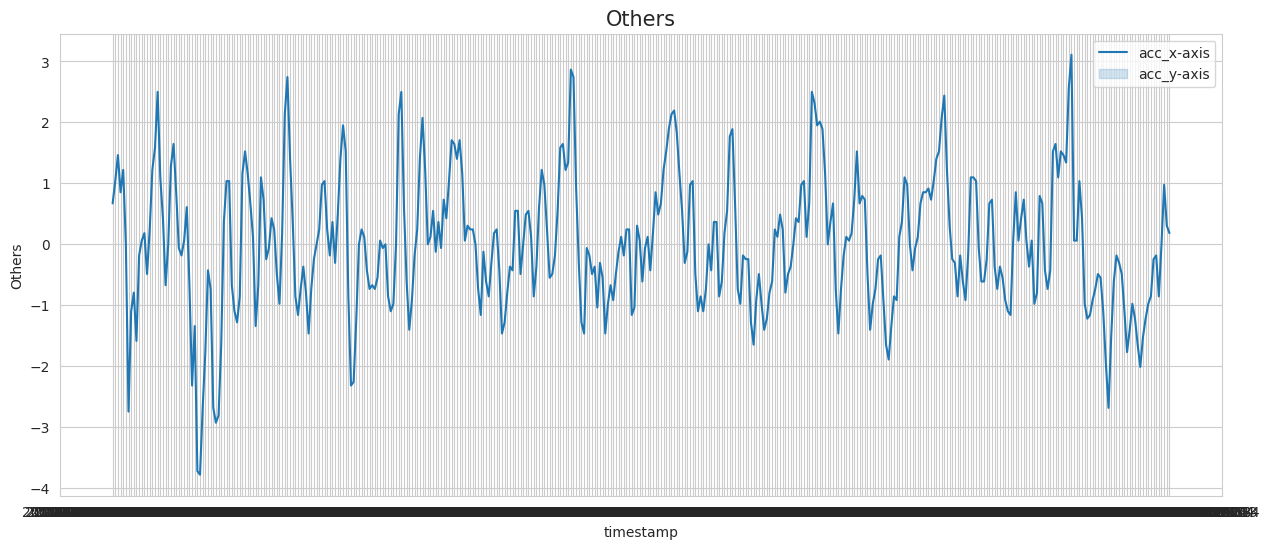

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


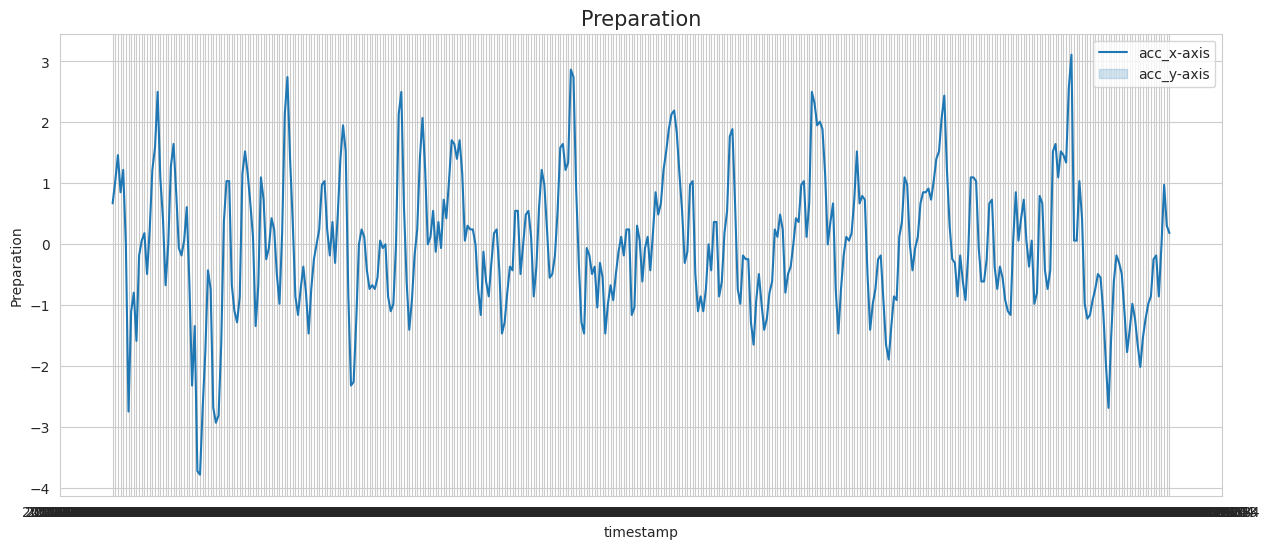

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


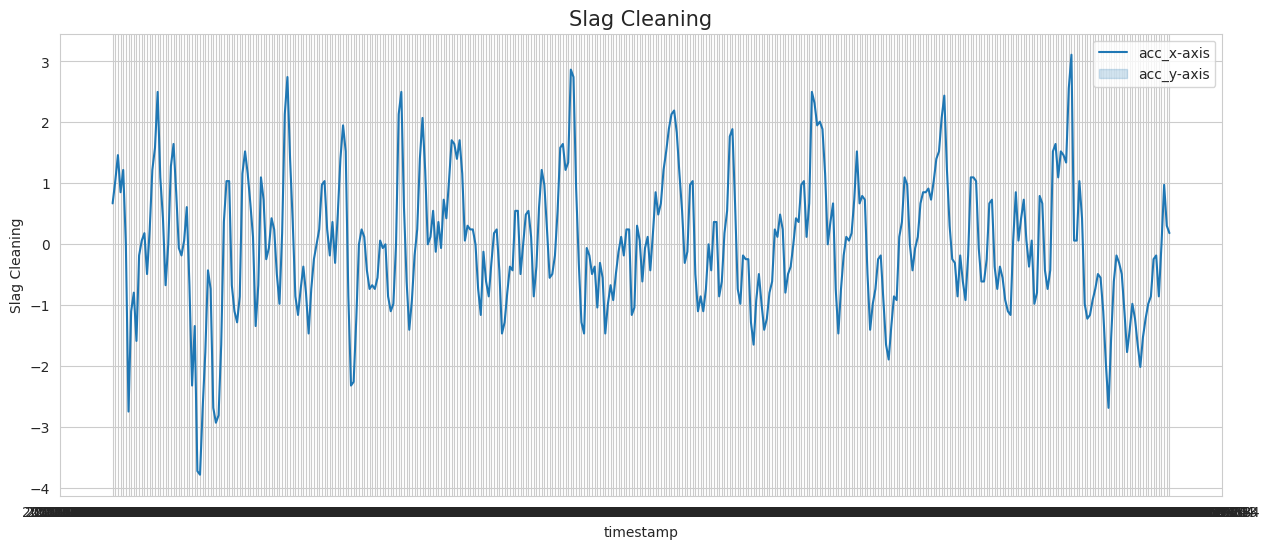

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


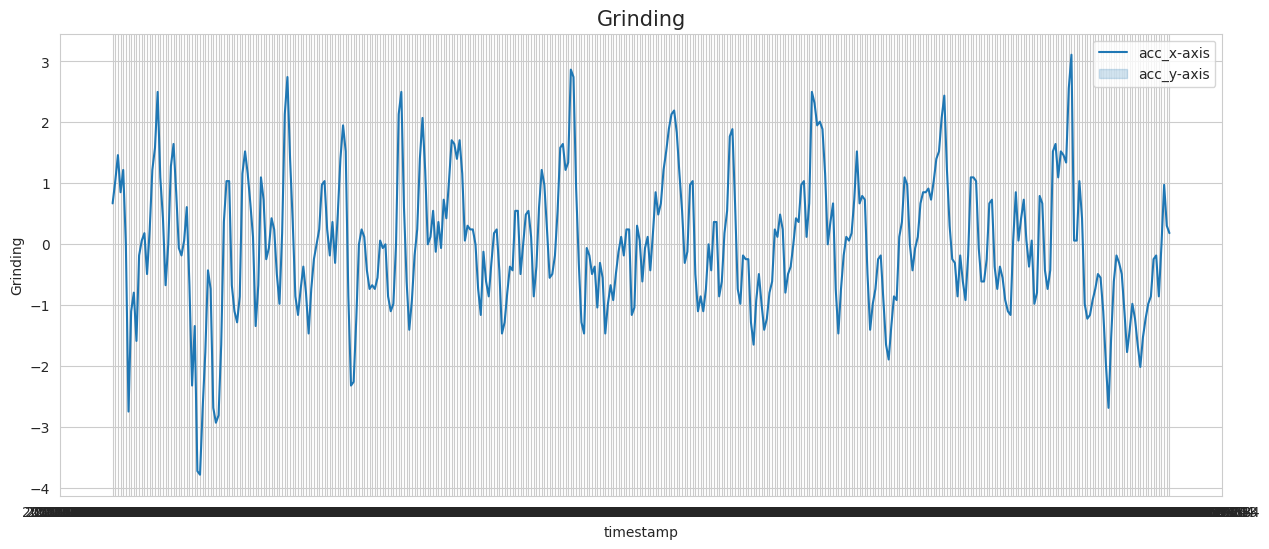

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
dt = jok_1g[:400]
for i in ['Welding', 'Others', 'Preparation', 'Slag Cleaning', 'Grinding']:
  plt.figure(figsize = (15, 6))
  sns.lineplot(data = dt, x = 'timestamp', y = 'accx')
  #sns.lineplot(y = 'accy', x = 'timestamp', data = dt)
  #sns.lineplot(y = 'accz', x = 'timestamp', data = dt)
  plt.legend(['acc_x-axis', 'acc_y-axis', 'acc_z-axis'])
  plt.ylabel(i)
  plt.title(i, fontsize = 15)
  plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) 

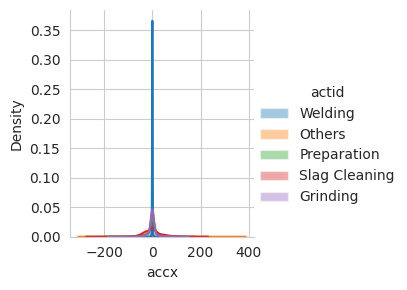

In [67]:
import seaborn as sns 

dt = jok_1g
sns.FacetGrid(jok_1g, hue='actid').map(sns.distplot, 'accx').add_legend()


In [68]:
print(jok_1g.columns)

Index(['timestamp', 'elapsed', 'accx', 'accy', 'accz', 'gyrx', 'gyry', 'gyrz',
       'magx', 'magy', 'magz', 'subid-gradeid', 'dicontinuityid', 'act_pos',
       'actid'],
      dtype='object')


In [69]:

reorder_data_0 = jok_1g

In [70]:
pip install tsextract

Note: you may need to restart the kernel to use updated packages.


In [71]:
jok_1g.columns

Index(['timestamp', 'elapsed', 'accx', 'accy', 'accz', 'gyrx', 'gyry', 'gyrz',
       'magx', 'magy', 'magz', 'subid-gradeid', 'dicontinuityid', 'act_pos',
       'actid'],
      dtype='object')

In [72]:
from tsextract.feature_extraction.extract import build_features

def extract_feature(reorder_data_0):
    features={}
    features_request = {
        "window":[10]        
    }                
    acc_x = build_features(reorder_data_0['accx'], features_request, include_tzero=False)
    acc_y = build_features(reorder_data_0['accy'], features_request, include_tzero=False)
    acc_z = build_features(reorder_data_0['accz'], features_request, include_tzero=False)

    gyr_x = build_features(reorder_data_0['gyrx'], features_request, include_tzero=False)
    gyr_y = build_features(reorder_data_0['gyry'], features_request, include_tzero=False)
    gyr_z = build_features(reorder_data_0['gyrz'], features_request, include_tzero=False)

    mag_x = build_features(reorder_data_0['magx'], features_request, include_tzero=False)
    mag_y = build_features(reorder_data_0['magy'], features_request, include_tzero=False)
    mag_z = build_features(reorder_data_0['magz'], features_request, include_tzero=False)

    activity = build_features(reorder_data_0['act_pos'], features_request, include_tzero=False)

    features={
        'acc_x': acc_x,
        'acc_y': acc_y,
        'acc_z': acc_x,
    
        'gyr_x': gyr_x,
        'gyr_y': gyr_y,
        'gyr_z': gyr_z,
    
        'mag_x': mag_x,
        'mag_y': mag_y,
        'mag_z':mag_z,
    
        'activity':activity,
    }
    return features

In [73]:
# menerapkan window slicing 
features = extract_feature(jok_1g) # nama parameter menyesuaikan
 

In [74]:
#ini dilompat
"""
selected_col = ['timestamp(+0700)', 'acc-x-axis(g)', 'acc-y-axis(g)', 'acc-z-axis(g)', 
                 'gyr-x-axis(deg/s)','gyr-y-axis(deg/s)', 'gyr-z-axis(deg/s)', 'mag-x-axis(T)','mag-y-axis(T)', 
                'mag-z-axis(T)', 'actid','subid-gradeid', 'positionid', 'dicontinuityid',' epoc(ms) ',
                'elapsed(s)','Unnamed: 0']
features_all_data =[]
for idx in range(len(data)):
    data_cp = data[idx].copy()
    reorder_data = data_cp.reindex(columns=selected_col)
    features = extract_feature(reorder_data)
    features_all_data.append(features)
"""

"\nselected_col = ['timestamp(+0700)', 'acc-x-axis(g)', 'acc-y-axis(g)', 'acc-z-axis(g)', \n                 'gyr-x-axis(deg/s)','gyr-y-axis(deg/s)', 'gyr-z-axis(deg/s)', 'mag-x-axis(T)','mag-y-axis(T)', \n                'mag-z-axis(T)', 'actid','subid-gradeid', 'positionid', 'dicontinuityid',' epoc(ms) ',\n                'elapsed(s)','Unnamed: 0']\nfeatures_all_data =[]\nfor idx in range(len(data)):\n    data_cp = data[idx].copy()\n    reorder_data = data_cp.reindex(columns=selected_col)\n    features = extract_feature(reorder_data)\n    features_all_data.append(features)\n"

In [75]:
features['acc_y'].columns

Index(['T-10', 'T-9', 'T-8', 'T-7', 'T-6', 'T-5', 'T-4', 'T-3', 'T-2', 'T-1',
       'Target_Tplus3'],
      dtype='object')

In [76]:
acc_x = features['acc_x'].drop(['Target_Tplus3'],axis=1)
acc_y = features['acc_y'].drop(['Target_Tplus3'],axis=1)
acc_z = features['acc_z'].drop(['Target_Tplus3'],axis=1)
print(f'x: {acc_x.shape}, y:{acc_y.shape}, z:{acc_z.shape}')

x: (65169, 10), y:(65169, 10), z:(65169, 10)


In [77]:
mag_x = features['mag_x'].drop(['Target_Tplus3'],axis=1)
mag_y = features['mag_y'].drop(['Target_Tplus3'],axis=1)
mag_z = features['mag_z'].drop(['Target_Tplus3'],axis=1)
print(f'x: {mag_x.shape}, y:{mag_y.shape}, az:{mag_z.shape}')

x: (65169, 10), y:(65169, 10), az:(65169, 10)


In [78]:
gyr_x = features['gyr_x'].drop(['Target_Tplus3'],axis=1)
gyr_y = features['gyr_y'].drop(['Target_Tplus3'],axis=1)
gyr_z = features['gyr_z'].drop(['Target_Tplus3'],axis=1)
print(f'x: {gyr_x.shape}, y:{gyr_y.shape}, z:{gyr_z.shape}')

x: (65169, 10), y:(65169, 10), z:(65169, 10)


In [79]:
# target (yang akan diprediksi)
act = features['activity'].drop(['Target_Tplus3'],axis=1).mode(axis=1)[0]

In [80]:
# prediktor + target
x = pd.concat([acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,act],axis=1)

In [81]:
#x.to_csv("prep_result_data.csv", mode='a')

pada tahap data understanding perlu diidentifikasi prosentase yang dibutuhkan dari setiap aktivitas yang dilakukan oleh juru las. gunakan grafik pie chart untuk menggambarkan kompoisis aktivitas yang dilakukan. 

In [82]:
x.head()

,T-10,T-9,T-8,T-7,T-6,T-5,T-4,T-3,T-2,T-1,...,T-9,T-8,T-7,T-6,T-5,T-4,T-3,T-2,T-1,0
Date,,,,,,,,,,,,,,,,,,,,,
10,0.671,1.037,1.463,0.854,1.220,0.000,-2.744,-1.098,-0.793,-1.585,...,3.750000e-07,-3.750000e-07,-1.125000e-06,-3.750000e-07,-3.750000e-07,-7.500000e-07,1.562000e-06,-7.500000e-07,0.000000e+00,Welding_1g
11,1.037,1.463,0.854,1.220,0.000,-2.744,-1.098,-0.793,-1.585,-0.183,...,-3.750000e-07,-1.125000e-06,-3.750000e-07,-3.750000e-07,-7.500000e-07,1.562000e-06,-7.500000e-07,0.000000e+00,-3.750000e-07,Welding_1g
12,1.463,0.854,1.220,0.000,-2.744,-1.098,-0.793,-1.585,-0.183,0.061,...,-1.125000e-06,-3.750000e-07,-3.750000e-07,-7.500000e-07,1.562000e-06,-7.500000e-07,0.000000e+00,-3.750000e-07,3.750000e-07,Welding_1g
13,0.854,1.220,0.000,-2.744,-1.098,-0.793,-1.585,-0.183,0.061,0.183,...,-3.750000e-07,-3.750000e-07,-7.500000e-07,1.562000e-06,-7.500000e-07,0.000000e+00,-3.750000e-07,3.750000e-07,7.500000e-07,Welding_1g
14,1.220,0.000,-2.744,-1.098,-0.793,-1.585,-0.183,0.061,0.183,-0.488,...,-3.750000e-07,-7.500000e-07,1.562000e-06,-7.500000e-07,0.000000e+00,-3.750000e-07,3.750000e-07,7.500000e-07,-1.562000e-06,Welding_1g


In [83]:
x

,T-10,T-9,T-8,T-7,T-6,T-5,T-4,T-3,T-2,T-1,...,T-9,T-8,T-7,T-6,T-5,T-4,T-3,T-2,T-1,0
Date,,,,,,,,,,,,,,,,,,,,,
10,0.671,1.037,1.463,0.854,1.220,0.000,-2.744,-1.098,-0.793,-1.585,...,3.750000e-07,-3.750000e-07,-1.125000e-06,-3.750000e-07,-3.750000e-07,-7.500000e-07,1.562000e-06,-7.500000e-07,0.000000e+00,Welding_1g
11,1.037,1.463,0.854,1.220,0.000,-2.744,-1.098,-0.793,-1.585,-0.183,...,-3.750000e-07,-1.125000e-06,-3.750000e-07,-3.750000e-07,-7.500000e-07,1.562000e-06,-7.500000e-07,0.000000e+00,-3.750000e-07,Welding_1g
12,1.463,0.854,1.220,0.000,-2.744,-1.098,-0.793,-1.585,-0.183,0.061,...,-1.125000e-06,-3.750000e-07,-3.750000e-07,-7.500000e-07,1.562000e-06,-7.500000e-07,0.000000e+00,-3.750000e-07,3.750000e-07,Welding_1g
13,0.854,1.220,0.000,-2.744,-1.098,-0.793,-1.585,-0.183,0.061,0.183,...,-3.750000e-07,-3.750000e-07,-7.500000e-07,1.562000e-06,-7.500000e-07,0.000000e+00,-3.750000e-07,3.750000e-07,7.500000e-07,Welding_1g
14,1.220,0.000,-2.744,-1.098,-0.793,-1.585,-0.183,0.061,0.183,-0.488,...,-3.750000e-07,-7.500000e-07,1.562000e-06,-7.500000e-07,0.000000e+00,-3.750000e-07,3.750000e-07,7.500000e-07,-1.562000e-06,Welding_1g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65174,0.366,0.549,0.793,1.220,1.341,1.463,1.646,1.524,0.488,0.366,...,-7.500000e-07,-1.187000e-06,-7.500000e-07,-1.187000e-06,-7.500000e-07,0.000000e+00,-7.500000e-07,-3.750000e-07,-3.750000e-07,Others
65175,0.549,0.793,1.220,1.341,1.463,1.646,1.524,0.488,0.366,0.610,...,-1.187000e-06,-7.500000e-07,-1.187000e-06,-7.500000e-07,0.000000e+00,-7.500000e-07,-3.750000e-07,-3.750000e-07,-7.500000e-07,Others
65176,0.793,1.220,1.341,1.463,1.646,1.524,0.488,0.366,0.610,0.366,...,-7.500000e-07,-1.187000e-06,-7.500000e-07,0.000000e+00,-7.500000e-07,-3.750000e-07,-3.750000e-07,-7.500000e-07,-1.187000e-06,Others


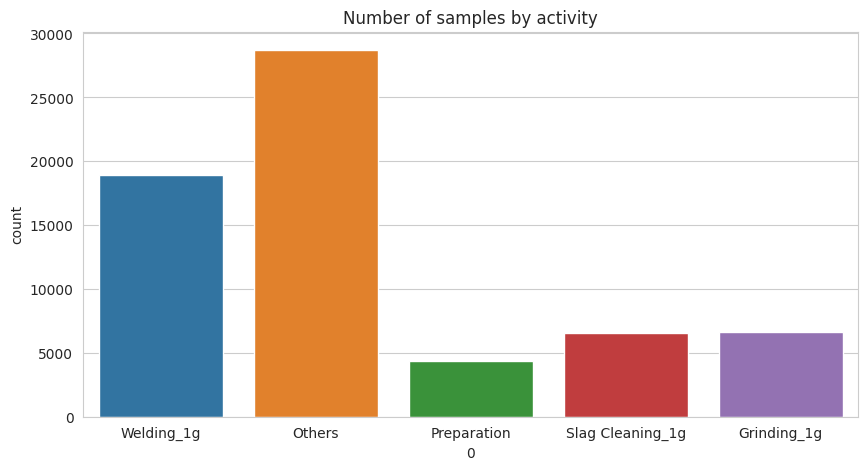

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
plt.figure(figsize = (10, 5))
sns.countplot(x = 0, data = x)
plt.title('Number of samples by activity')
plt.show()

In [85]:
x[0].unique()

array(['Welding_1g', 'Others', 'Preparation', 'Slag Cleaning_1g',
       'Grinding_1g'], dtype=object)

In [86]:
x.columns

Index(['T-10',  'T-9',  'T-8',  'T-7',  'T-6',  'T-5',  'T-4',  'T-3',  'T-2',
        'T-1', 'T-10',  'T-9',  'T-8',  'T-7',  'T-6',  'T-5',  'T-4',  'T-3',
        'T-2',  'T-1', 'T-10',  'T-9',  'T-8',  'T-7',  'T-6',  'T-5',  'T-4',
        'T-3',  'T-2',  'T-1', 'T-10',  'T-9',  'T-8',  'T-7',  'T-6',  'T-5',
        'T-4',  'T-3',  'T-2',  'T-1', 'T-10',  'T-9',  'T-8',  'T-7',  'T-6',
        'T-5',  'T-4',  'T-3',  'T-2',  'T-1', 'T-10',  'T-9',  'T-8',  'T-7',
        'T-6',  'T-5',  'T-4',  'T-3',  'T-2',  'T-1', 'T-10',  'T-9',  'T-8',
        'T-7',  'T-6',  'T-5',  'T-4',  'T-3',  'T-2',  'T-1', 'T-10',  'T-9',
        'T-8',  'T-7',  'T-6',  'T-5',  'T-4',  'T-3',  'T-2',  'T-1', 'T-10',
        'T-9',  'T-8',  'T-7',  'T-6',  'T-5',  'T-4',  'T-3',  'T-2',  'T-1',
            0],
      dtype='object')

In [87]:
""""""
""""for i in ['Welding', 'Others', 'Preparation', 'Slag Cleaning', 'Grinding']:
  data_x = x[:400]
  plt.figure(figsize = (15, 6))
  sns.lineplot(y = 'acc_x', x = 'timestamp', data = x)
  sns.lineplot(y = 'acc_y', x = 'timestamp', data = x)
  sns.lineplot(y = 'acc_z', x = 'timestamp', data = x)
  plt.legend(['x-axis', 'y-axis', 'z-axis'])
  plt.ylabel(i)
  plt.title(i, fontsize = 15)
  plt.show()
"""

'"for i in [\'Welding\', \'Others\', \'Preparation\', \'Slag Cleaning\', \'Grinding\']:\n  data_x = x[:400]\n  plt.figure(figsize = (15, 6))\n  sns.lineplot(y = \'acc_x\', x = \'timestamp\', data = x)\n  sns.lineplot(y = \'acc_y\', x = \'timestamp\', data = x)\n  sns.lineplot(y = \'acc_z\', x = \'timestamp\', data = x)\n  plt.legend([\'x-axis\', \'y-axis\', \'z-axis\'])\n  plt.ylabel(i)\n  plt.title(i, fontsize = 15)\n  plt.show()\n'

In [88]:

others= x[x[0]=='Others'].sample(4384)
welding=x[x[0]=='Welding_1g'].sample(4384)
grinding=x[x[0]=='Grinding_1g'].sample(4384)
slag= x[x[0]=='Slag Cleaning_1g'].sample(4384)
prep =x[x[0]=='Preparation'].sample(4384)
balance_data = pd.DataFrame()
balance_data = balance_data.append([others,welding,grinding,slag,prep])
balance_data.shape



AttributeError: 'DataFrame' object has no attribute 'append'

hasil preproses sebelumnya adalah hasil window slicing yang sudah diformat secara 

In [ ]:
import scipy.fft 
# converting the signals from time domain to frequency domain using FFT
x_list_fft = pd.Series(x_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
y_list_fft = pd.Series(y_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
z_list_fft = pd.Series(z_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])

# Statistical Features on raw x, y and z in frequency domain
# FFT mean
X_train['x_mean_fft'] = pd.Series(x_list_fft).apply(lambda x: x.mean())
X_train['y_mean_fft'] = pd.Series(y_list_fft).apply(lambda x: x.mean())
X_train['z_mean_fft'] = pd.Series(z_list_fft).apply(lambda x: x.mean())

# FFT std dev
X_train['x_std_fft'] = pd.Series(x_list_fft).apply(lambda x: x.std())
X_train['y_std_fft'] = pd.Series(y_list_fft).apply(lambda x: x.std())
X_train['z_std_fft'] = pd.Series(z_list_fft).apply(lambda x: x.std())

# FFT avg absolute diff
X_train['x_aad_fft'] = pd.Series(x_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['y_aad_fft'] = pd.Series(y_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['z_aad_fft'] = pd.Series(z_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

In [ ]:
import scipy.fft 
# converting the signals from time domain to frequency domain using FFT
x_list_fft = pd.Series(x_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
y_list_fft = pd.Series(y_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
z_list_fft = pd.Series(z_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])

# Statistical Features on raw x, y and z in frequency domain
# FFT mean
X_train['x_mean_fft'] = pd.Series(x_list_fft).apply(lambda x: x.mean())
X_train['y_mean_fft'] = pd.Series(y_list_fft).apply(lambda x: x.mean())
X_train['z_mean_fft'] = pd.Series(z_list_fft).apply(lambda x: x.mean())

# FFT std dev
X_train['x_std_fft'] = pd.Series(x_list_fft).apply(lambda x: x.std())
X_train['y_std_fft'] = pd.Series(y_list_fft).apply(lambda x: x.std())
X_train['z_std_fft'] = pd.Series(z_list_fft).apply(lambda x: x.std())

# FFT avg absolute diff
X_train['x_aad_fft'] = pd.Series(x_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['y_aad_fft'] = pd.Series(y_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['z_aad_fft'] = pd.Series(z_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

In [ ]:
import scipy.signal 
f, t, Sxx = signal.spectrogram(x, fs)
plt.figure(figsize=(8,10))
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()


In [ ]:
data_sample.info()

In [ ]:
data_sample.rename(columns={0:"act"}, inplace=True)
data_sample.info()

In [ ]:
data_sample.columns

In [ ]:
from sklearn import preprocessing
data_x = data_sample.copy(deep=True).drop(['act'],axis=1)

y=data_sample[['act']]

encoder = preprocessing.LabelEncoder()
encoder.fit(y)
y_label = encoder.transform(y)

In [ ]:
y.value_counts()

In [ ]:
sns.set_style(“whitegrid”)
plt.figure(figsize = (10, 5))
sns.countplot(x = ‘act’, data = df)
plt.title(‘Number of samples by activity’)
plt.show()

In [ ]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(data_x)

In [ ]:
# transformasi ke fft
from scipy import fftpack

sig_fft = fftpack.fft(data_x)
amplitude = np.abs(sig_fft)
power = amplitude **2
angle = np.angle(sig_fft)

In [ ]:
print(f'data_x: {data_x.shape},amplitude: {amplitude.shape}, power: {power.shape}, angle:{angle.shape}')

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_scaled, y_label,test_size=0.3, random_state=0)

In [ ]:
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['poly'], 'degree': [2, 3], 'C': [1, 10], 'coef0' : [0.1,0.2,0.3]
},
           {'kernel' : ['sigmoid'], 'gamma': ['scale', 'auto'], 'coef0' : [0.1,0.2,0.3,0.4,0.5]}]

In [ ]:
import sklearn
from sklearn.svm import SVC
print (sklearn.__version__)
#C = 1.0
#models = SVC(kernel="rbf", C=C)
#train_models = models.fit(X_train, y_train)
svm_model = GridSearchCV(SVC(), params_grid[0], cv=5)
svm_model.fit(X_train, y_train)

In [ ]:
import sklearn
from sklearn.svm import SVC
print (sklearn.__version__)
#C = 1.0
#models = SVC(kernel="poly", C=C)
#train_models = models.fit(X_train, y_train)
svm_model1 = GridSearchCV(SVC(), params_grid[1], cv=5)
svm_model1.fit(X_train, y_train)

In [ ]:
import sklearn
from sklearn.svm import SVC
print (sklearn.__version__)
#C = 1.0
#models = SVC(kernel="sigmoid", C=C)
#train_models = models.fit(X_train, y_train)
svm_model2 = GridSearchCV(SVC(), params_grid[2], cv=5)
svm_model2.fit(X_train, y_train)

In [ ]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_test)
Y_pred_label = list(encoder.inverse_transform(Y_pred))

In [ ]:
# View the accuracy score
print('Best score for training data:', svm_model1.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model1.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model1.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model1.best_estimator_.gamma,"\n")

final_model1 = svm_model1.best_estimator_
Y_pred1 = final_model1.predict(X_test)
Y_pred_label1 = list(encoder.inverse_transform(Y_pred1))

In [ ]:
# View the accuracy score
print('Best score for training data:', svm_model2.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model2.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model2.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model2.best_estimator_.gamma,"\n")

final_model2 = svm_model2.best_estimator_
Y_pred2 = final_model2.predict(X_test)
Y_pred_label2 = list(encoder.inverse_transform(Y_pred2))

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
Y_pred_label[0:5]

In [ ]:
Y_pred_label1[0:5]

In [ ]:
Y_pred_label2[0:5]

In [ ]:
y_test[0:5]

In [ ]:
y_test = list(encoder.inverse_transform(y_test))

In [ ]:
cm = confusion_matrix(y_test, Y_pred_label)
cm_df = pd.DataFrame(cm,
                     index = ['Preparation','Welding','Others','Slag Cleaning','Grinding'], 
                     columns = ['Others', 'Preparation', 'Others', 'Welding', 'Welding'])

In [ ]:
cm1 = confusion_matrix(y_test, Y_pred_label1)
cm1_df = pd.DataFrame(cm1,
                     index = ['Preparation','Welding','Others','Slag Cleaning','Grinding'], 
                     columns = ['Others', 'Preparation', 'Others', 'Others', 'Welding'])

In [ ]:
cm2 = confusion_matrix(y_test, Y_pred_label2)
cm2_df = pd.DataFrame(cm2,
                     index = ['Preparation','Welding','Others','Slag Cleaning','Grinding'], 
                     columns = ['Others', 'Others', 'Others', 'Others', 'Others'])

In [ ]:
cm = confusion_matrix(y_test, Y_pred_label)

In [ ]:
cm1 = confusion_matrix(y_test, Y_pred_label1)

In [ ]:
cm2 = confusion_matrix(y_test, Y_pred_label2)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(cm1_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(cm2_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel="rbf", gamma=0.7, C=1.0)
clf.fit(X_train,y_train)

In [ ]:
from sklearn.svm import SVC
clf1 = SVC(kernel="poly", degree=3, gamma="auto", C=1.0)
clf1.fit(X_train,y_train)

In [ ]:
Y_pred_label = list(encoder.inverse_transform(Y_pred))

In [ ]:
x_list = []
y_list = []
z_list = []
train_labels = []

window_size = 100
step_size = 50

# creating overlaping windows of size window-size 100
for i in range(0, df_train.shape[0] - window_size, step_size):
    xs = df_train['x-axis'].values[i: i + 100]
    ys = df_train['y-axis'].values[i: i + 100]
    zs = df_train['z-axis'].values[i: i + 100]
    label = stats.mode(df_train['activity'][i: i + 100])[0][0]

    x_list.append(xs)
    y_list.append(ys)
    z_list.append(zs)
    train_labels.append(label)

# Statistical Features on raw x, y and z in time domain
X_train = pd.DataFrame()

# mean
X_train['x_mean'] = pd.Series(x_list).apply(lambda x: x.mean())
X_train['y_mean'] = pd.Series(y_list).apply(lambda x: x.mean())
X_train['z_mean'] = pd.Series(z_list).apply(lambda x: x.mean())

# std dev
X_train['x_std'] = pd.Series(x_list).apply(lambda x: x.std())
X_train['y_std'] = pd.Series(y_list).apply(lambda x: x.std())
X_train['z_std'] = pd.Series(z_list).apply(lambda x: x.std())

# avg absolute diff
X_train['x_aad'] = pd.Series(x_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['y_aad'] = pd.Series(y_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['z_aad'] = pd.Series(z_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# min
X_train['x_min'] = pd.Series(x_list).apply(lambda x: x.min())
X_train['y_min'] = pd.Series(y_list).apply(lambda x: x.min())
X_train['z_min'] = pd.Series(z_list).apply(lambda x: x.min())

# max
X_train['x_max'] = pd.Series(x_list).apply(lambda x: x.max())
X_train['y_max'] = pd.Series(y_list).apply(lambda x: x.max())
X_train['z_max'] = pd.Series(z_list).apply(lambda x: x.max())

# max-min diff
X_train['x_maxmin_diff'] = X_train['x_max'] - X_train['x_min']
X_train['y_maxmin_diff'] = X_train['y_max'] - X_train['y_min']
X_train['z_maxmin_diff'] = X_train['z_max'] - X_train['z_min']

# median
X_train['x_median'] = pd.Series(x_list).apply(lambda x: np.median(x))
X_train['y_median'] = pd.Series(y_list).apply(lambda x: np.median(x))
X_train['z_median'] = pd.Series(z_list).apply(lambda x: np.median(x))

# median abs dev 
X_train['x_mad'] = pd.Series(x_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['y_mad'] = pd.Series(y_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['z_mad'] = pd.Series(z_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# interquartile range
X_train['x_IQR'] = pd.Series(x_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['y_IQR'] = pd.Series(y_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['z_IQR'] = pd.Series(z_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# negtive count
X_train['x_neg_count'] = pd.Series(x_list).apply(lambda x: np.sum(x < 0))
X_train['y_neg_count'] = pd.Series(y_list).apply(lambda x: np.sum(x < 0))
X_train['z_neg_count'] = pd.Series(z_list).apply(lambda x: np.sum(x < 0))

# positive count
X_train['x_pos_count'] = pd.Series(x_list).apply(lambda x: np.sum(x > 0))
X_train['y_pos_count'] = pd.Series(y_list).apply(lambda x: np.sum(x > 0))
X_train['z_pos_count'] = pd.Series(z_list).apply(lambda x: np.sum(x > 0))

# values above mean
X_train['x_above_mean'] = pd.Series(x_list).apply(lambda x: np.sum(x > x.mean()))
X_train['y_above_mean'] = pd.Series(y_list).apply(lambda x: np.sum(x > x.mean()))
X_train['z_above_mean'] = pd.Series(z_list).apply(lambda x: np.sum(x > x.mean()))

# number of peaks
X_train['x_peak_count'] = pd.Series(x_list).apply(lambda x: len(find_peaks(x)[0]))
X_train['y_peak_count'] = pd.Series(y_list).apply(lambda x: len(find_peaks(x)[0]))
X_train['z_peak_count'] = pd.Series(z_list).apply(lambda x: len(find_peaks(x)[0]))

# skewness
X_train['x_skewness'] = pd.Series(x_list).apply(lambda x: stats.skew(x))
X_train['y_skewness'] = pd.Series(y_list).apply(lambda x: stats.skew(x))
X_train['z_skewness'] = pd.Series(z_list).apply(lambda x: stats.skew(x))

# kurtosis
X_train['x_kurtosis'] = pd.Series(x_list).apply(lambda x: stats.kurtosis(x))
X_train['y_kurtosis'] = pd.Series(y_list).apply(lambda x: stats.kurtosis(x))
X_train['z_kurtosis'] = pd.Series(z_list).apply(lambda x: stats.kurtosis(x))

# energy
X_train['x_energy'] = pd.Series(x_list).apply(lambda x: np.sum(x**2)/100)
X_train['y_energy'] = pd.Series(y_list).apply(lambda x: np.sum(x**2)/100)
X_train['z_energy'] = pd.Series(z_list).apply(lambda x: np.sum(x**2/100))

# avg resultant
X_train['avg_result_accl'] = [i.mean() for i in ((pd.Series(x_list)**2 + pd.Series(y_list)**2 + pd.Series(z_list)**2)**0.5)]

# signal magnitude area
X_train['sma'] =    pd.Series(x_list).apply(lambda x: np.sum(abs(x)/100)) + pd.Series(y_list).apply(lambda x: np.sum(abs(x)/100)) \
                  + pd.Series(z_list).apply(lambda x: np.sum(abs(x)/100))

https://realpython.com/python-scipy-fft/ untuk transformasi 

https://github.com/aybchan/time-series-classification deep learning

(https://github.com/hfawaz/InceptionTime) 

https://github.com/FilippoMB/Reservoir-Computing-framework-for-multivariate-time-series-classification

https://sander.ai/2014/05/12/fft-convolutions-in-theano.html

https://datascience.stackexchange.com/questions/42803/how-to-implement-a-fourier-convolution-layer-in-keras